In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/Housing_updated.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


Training set size: 381
Validation set size: 81
Testing set size: 83


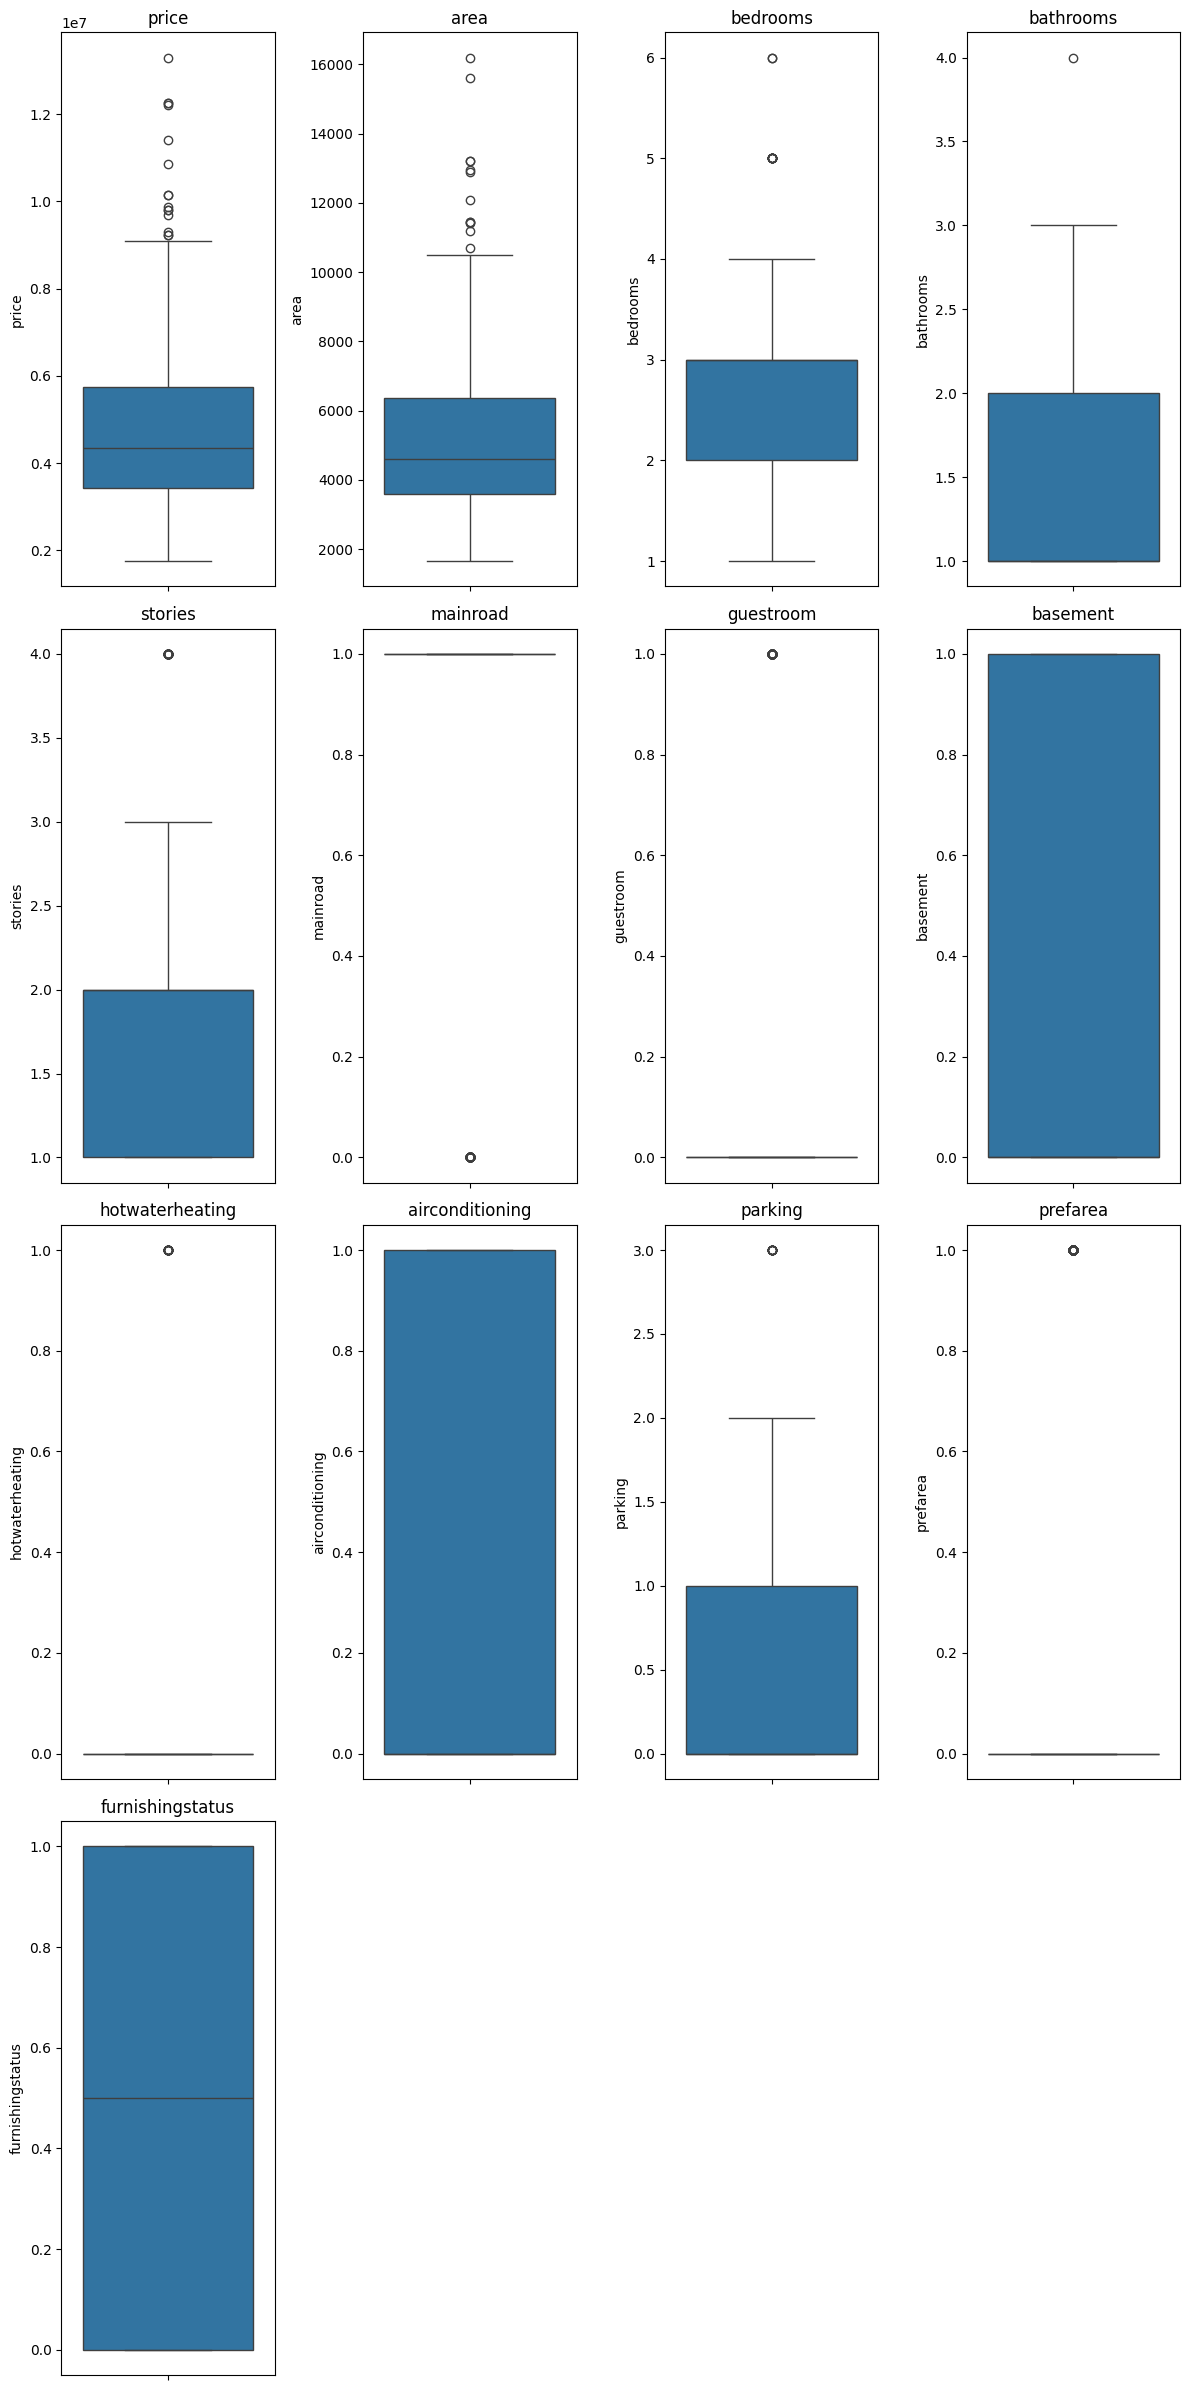

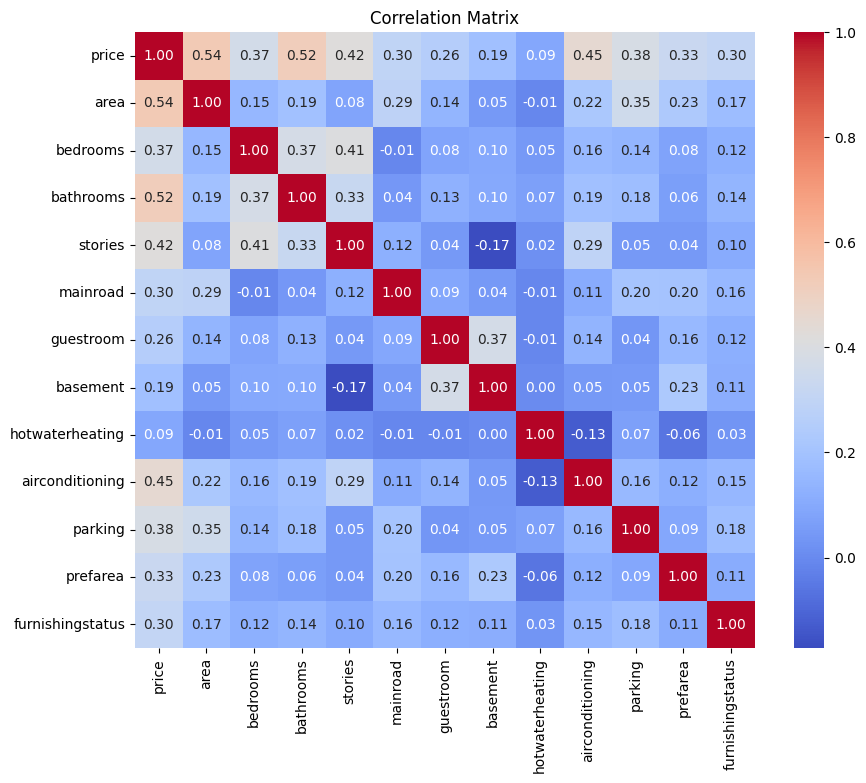

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify outliers using box plots
num_cols = len(df.select_dtypes(include=np.number).columns)
num_rows = (num_cols + 3) // 4  # Calculate the number of rows needed

plt.figure(figsize=(12, 6 * num_rows)) # Adjust figure height
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(num_rows, 4, i+1)  # Use calculated number of rows
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Calculate and visualize correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# prompt: remove all the outliers

import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame (as defined in the previous code)

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


# Apply outlier removal to numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
df_no_outliers = df.copy() # Create a copy to avoid modifying the original df

for col in numerical_cols:
  df_no_outliers = remove_outliers_iqr(df_no_outliers, col)

# Display or further process the DataFrame without outliers
print(df_no_outliers.shape)
df_no_outliers.head()

(123, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8400000,8875,3,1,1,1,0,0,0,0,1,0,0.5
108,6107500,3240,4,1,3,1,0,0,0,0,1,0,0.5
137,5740000,4640,4,1,2,1,0,0,0,0,1,0,0.5
158,5495000,7980,3,1,1,1,0,0,0,0,2,0,0.5
199,4907000,4200,3,1,2,1,0,0,0,0,1,0,1.0


In [ ]:
# prompt: now slice the data in such way that it is best for prediction of the prices considering all other metrices mentioned in the data frame for test train and validation

import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df_no_outliers' is your DataFrame after outlier removal

# Define features (X) and target variable (y)
X = df_no_outliers.drop('price', axis=1)  # Assuming 'price' is your target variable
y = df_no_outliers['price']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now you have:
# X_train, y_train: Training data
# X_val, y_val: Validation data
# X_test, y_test: Testing data

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (86, 12)
Validation set size: (18, 12)
Testing set size: (19, 12)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 12563826868224.0000 - mae: 3444848.7500 - val_loss: 11280915103744.0000 - val_mae: 3285011.0000
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12379159003136.0000 - mae: 3412968.2500 - val_loss: 11277509328896.0000 - val_mae: 3284506.0000
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12760280727552.0000 - mae: 3464063.0000 - val_loss: 11274537664512.0000 - val_mae: 3284065.2500
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13251754590208.0000 - mae: 3528876.5000 - val_loss: 11271672954880.0000 - val_mae: 3283640.5000
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12411013693440.0000 - mae: 3423850.5000 - val_loss: 11269003280384.0000 - val_mae: 3283244.7500
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12655848849408.0000 - mae: 3446580.7500 - val_loss: 11266324168704.0000 - val_mae: 3282847.2500
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12829358817280.0000 - mae: 348

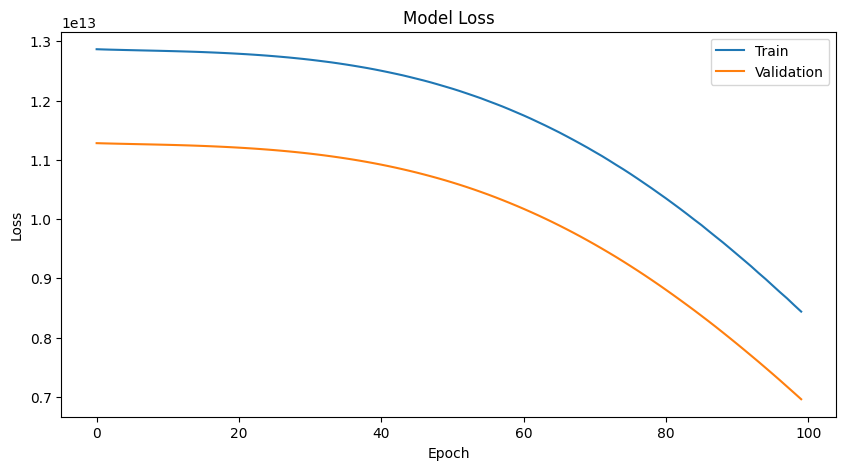

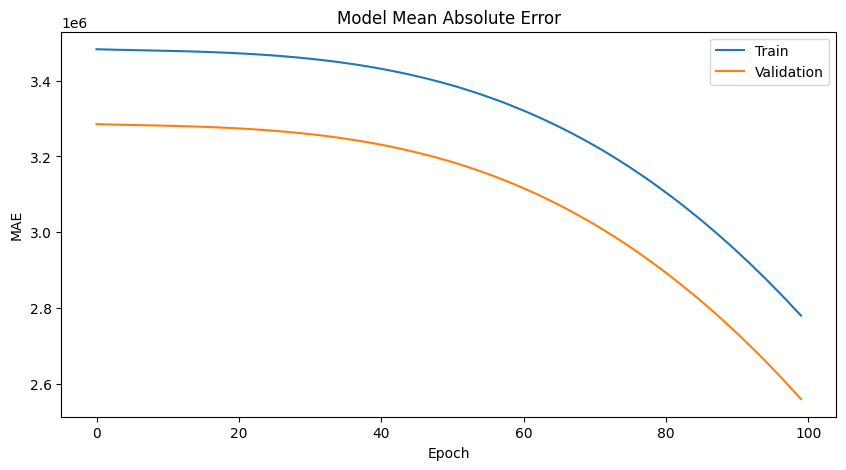

In [ ]:
# prompt: No train the model showing validation metrices

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae']) # Use 'mae' for Mean Absolute Error

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error on test data: {mae}")


# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation MAE values
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# prompt: Now save the trained model and also make it possible to take the input form user and predic the price after given other paramters

# Save the trained model
model.save('housing_price_model.h5')

# Function to predict house price from user input
def predict_price():
    # Get user input for features
    try:
        area = float(input("Enter area: "))
        bedrooms = int(input("Enter number of bedrooms: "))
        bathrooms = float(input("Enter number of bathrooms: "))
        stories = int(input("Enter number of stories: "))
        mainroad = int(input("Enter mainroad (1 for yes, 0 for no): "))
        guestroom = int(input("Enter guestroom (1 for yes, 0 for no): "))
        basement = int(input("Enter basement (1 for yes, 0 for no): "))
        hotwaterheating = int(input("Enter hotwaterheating (1 for yes, 0 for no): "))
        airconditioning = int(input("Enter airconditioning (1 for yes, 0 for no): "))
        parking = int(input("Enter parking space: "))
        prefarea = int(input("Enter prefarea (1 for yes, 0 for no): "))
        furnishingstatus_furnished = int(input("Enter furnishingstatus_furnished (1 for yes, 0 for no): "))
        furnishingstatus_semi_furnished = int(input("Enter furnishingstatus_semi_furnished (1 for yes, 0 for no): "))
        # ... get input for other features ...

        # Create a DataFrame from the user input
        user_input = pd.DataFrame({
            'area': [area],
            'bedrooms': [bedrooms],
            'bathrooms': [bathrooms],
            'stories': [stories],
            'mainroad': [mainroad],
            'guestroom': [guestroom],
            'basement': [basement],
            'hotwaterheating': [hotwaterheating],
            'airconditioning': [airconditioning],
            'parking': [parking],
            'prefarea': [prefarea],
            'furnishingstatus_furnished': [furnishingstatus_furnished],
            'furnishingstatus_semi-furnished': [furnishingstatus_semi_furnished],
            # ...add other features
        })

        # Make the prediction
        predicted_price = model.predict(user_input)[0][0]
        print(f"Predicted house price: {predicted_price}")
    except ValueError:
        print("Invalid input. Please enter valid numerical values.")

# Call the function to start the prediction process
predict_price()

Enter area: 2222
